### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [312]:
# importing pandas module 
import pandas as pd
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans


# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [313]:
df = pd.read_csv("C:\\Users\\anshumans\\Downloads\\vehicle.csv")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [314]:
#Dropping NA
df = df.dropna(axis = 0, how ='any') 

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [315]:
df['class'].value_counts()
  

car    413
bus    205
van    195
Name: class, dtype: int64

In [316]:
#sns.pairplot(df, hue="class")

### Check for any missing values in the data 

In [317]:
df = df.fillna(df.median())
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 3. Standardize the data 

In [319]:
from scipy.stats import zscore

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [320]:

df = df.drop('class', axis = 1)
print(df)
df.std(axis = 0)

     compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
6             97         43.0                  73.0         173.0   
7             90         43.0                  66.0         157.0   
8             86         34.0                  62.0         140.0   
10            86         36.0                  70.0         143.0   
11            90         34.0                  66.0         136.0   
12            88         46.0                  74.0         171.0   
13            89         42.0                  85.0         144.0   
14            94         49.0                  79.0         203.0   
15            96         55.0     

compactness                      8.233751
circularity                      6.146659
distance_circularity            15.783070
radius_ratio                    33.615402
pr.axis_aspect_ratio             7.973000
max.length_aspect_ratio          4.677174
scatter_ratio                   33.082186
elongatedness                    7.803380
pr.axis_rectangularity           2.573184
max.length_rectangularity       14.504648
scaled_variance                 31.165873
scaled_variance.1              175.270368
scaled_radius_of_gyration       32.332161
scaled_radius_of_gyration.1      7.475994
skewness_about                   4.921476
skewness_about.1                 8.926951
skewness_about.2                 6.153681
hollows_ratio                    7.398781
dtype: float64

In [321]:
z_score = df.apply(zscore)
print(z_score)

     compactness  circularity  distance_circularity  radius_ratio  \
0       0.163231     0.520408              0.060669      0.264970   
1      -0.322874    -0.619123              0.124067     -0.836393   
2       1.256966     0.845988              1.518823      1.187734   
3      -0.079822    -0.619123             -0.002729     -0.300595   
4      -1.052030    -0.130753             -0.763506      1.068668   
6       0.406283    -0.293543             -0.573312      0.116137   
7      -0.444400    -0.293543             -1.017098     -0.360128   
8      -0.930504    -1.758654             -1.270690     -0.866160   
10     -0.930504    -1.433074             -0.763506     -0.776860   
11     -0.444400    -1.758654             -1.017098     -0.985226   
12     -0.687452     0.194828             -0.509914      0.056604   
13     -0.565926    -0.456333              0.187465     -0.747094   
14      0.041705     0.683198             -0.192923      1.009135   
15      0.284757     1.659939     

### K - Means Clustering

In [322]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202


### 4. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [323]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
distortion = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  distortion.append( clusters.inertia_ )


Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [324]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion } )
clusters_df

,cluster_errors,num_clusters
0,2.917617e+07,1
1,6.905477e+06,2
2,4.610991e+06,3
3,3.333417e+06,4
4,2.288297e+06,5
5,1.823916e+06,6
6,1.601418e+06,7
7,1.466415e+06,8
8,1.307699e+06,9


### 6. Plotting Elbow/ Scree Plot

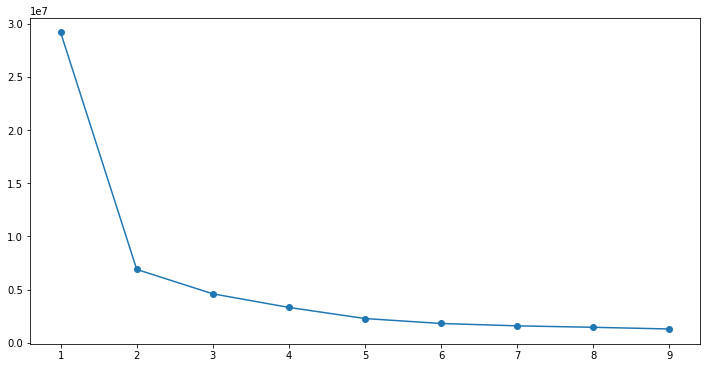

In [325]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [326]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(z_score)
mpg_df_attr_z_copy = z_score.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [327]:
centroids = cluster.cluster_centers_
centroids

array([[-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466]])

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [328]:
centroid_df = pd.DataFrame(centroids, columns = list(z_score) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695


In [329]:
prediction=cluster.predict(z_score)
z_score["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0E0D9D9E8>,
      dtype=object)

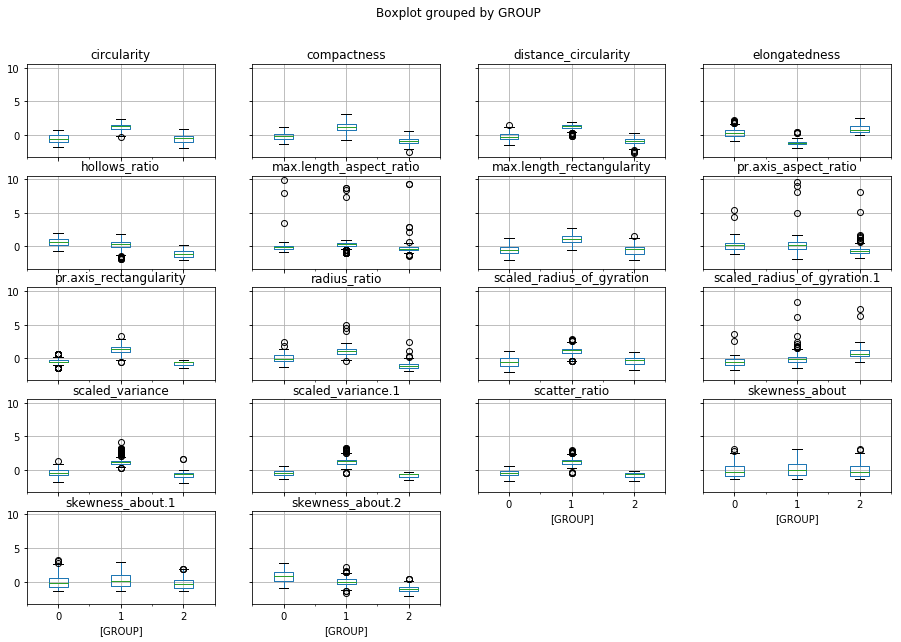

In [330]:
import matplotlib.pylab as plt

z_score.boxplot(by = 'GROUP',   figsize=(15, 10))

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [331]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [364]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])

In [365]:
a

array([[ 9.21719617,  0.66041123],
       [12.54629848, -0.2927718 ],
       [12.35490782,  1.11578269],
       [ 9.00136703,  1.14053294],
       [ 8.63174092, -0.32776401],
       [ 7.93907761, -3.40943207],
       [ 8.36279664,  1.68926656],
       [ 7.10760536, -4.4358701 ],
       [ 8.52815759, -2.45312377],
       [10.09256753,  2.07046025],
       [ 9.73396636,  1.25578141],
       [10.4720726 ,  3.17471263],
       [ 8.80322592, -2.70428736],
       [12.12106555,  1.48415899],
       [ 7.01360483, -0.77193602],
       [11.34878812,  1.01623507],
       [ 7.77581405, -1.29771399],
       [ 7.04997807,  0.35183657],
       [ 7.56583093, -3.85738703],
       [ 7.34161832,  0.68414412],
       [10.05538323, -0.90906413],
       [ 7.11124331,  1.7164138 ],
       [10.9275559 ,  0.56886272],
       [ 7.33011885,  0.60447575],
       [ 6.7016916 , -3.80137955],
       [10.19907461,  3.56441203],
       [ 8.5879811 , -1.15478266],
       [ 9.07178141, -0.16017956],
       [12.30522175,

In [366]:
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])

In [367]:
b

array([[-1.60660689e+00,  1.59200286e+01],
       [ 1.90305275e+00,  2.23071221e+01],
       [ 3.45347931e+00,  1.79836223e+01],
       [ 3.64839134e+00,  2.05365977e+01],
       [ 7.64693817e-02,  2.43602716e+01],
       [-2.70132085e+00,  1.83088978e+01],
       [ 1.41908683e+00,  2.17569390e+01],
       [ 1.25041434e+00,  2.10232272e+01],
       [-5.20092667e-02,  2.03435620e+01],
       [ 2.81985792e-01,  1.81671915e+01],
       [ 1.06272409e-01,  2.00112141e+01],
       [ 1.76164344e+00,  2.04258837e+01],
       [ 2.45358724e-01,  1.85369141e+01],
       [-6.64813559e-01,  2.06690035e+01],
       [ 1.87950181e+00,  2.10683341e+01],
       [-6.92114002e-01,  2.28358660e+01],
       [ 1.15836300e+00,  1.88999244e+01],
       [ 5.48270999e-01,  2.11451667e+01],
       [ 1.97645787e+00,  2.38284872e+01],
       [-1.61296993e+00,  1.82531737e+01],
       [-3.71228179e-01,  2.05930825e+01],
       [-1.38530795e+00,  1.94778288e+01],
       [ 3.56293070e-01,  2.21781525e+01],
       [-1.

In [368]:
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [369]:
c

array([[ 8.95245162, 16.23454967],
       [ 9.90902111, 21.87285193],
       [ 8.80616758, 16.44005282],
       [10.23895299, 19.77074215],
       [10.51415986, 21.89064558],
       [12.87415691, 20.62337523],
       [ 8.47801787, 19.70667756],
       [ 7.82399598, 20.6881712 ],
       [12.96246999, 23.9161785 ],
       [ 9.86760384, 20.06341271],
       [ 8.42125299, 20.62013892],
       [10.53508875, 20.96567904],
       [11.30106884, 21.12764772],
       [10.30814824, 19.59145971],
       [15.40012914, 20.07217639],
       [10.49623628, 19.01823022],
       [ 6.79179269, 15.65666614],
       [ 9.74327748, 18.27938011],
       [ 9.44801502, 20.5531315 ],
       [ 8.8312757 , 17.88465249],
       [ 7.422264  , 20.16305787],
       [10.44440923, 18.2434452 ],
       [10.00800841, 19.28319938],
       [10.65154167, 20.75445563],
       [ 7.83716195, 18.06360459],
       [ 9.33986222, 20.28561031],
       [ 9.72487994, 20.03877504],
       [ 9.25583114, 20.76557997],
       [10.80433682,

### 9. Combine all three arrays a,b,c into a dataframe

In [370]:
np_array = np.concatenate([a, b, c], axis=0)

In [371]:
np_array

array([[ 9.21719617e+00,  6.60411225e-01],
       [ 1.25462985e+01, -2.92771795e-01],
       [ 1.23549078e+01,  1.11578269e+00],
       [ 9.00136703e+00,  1.14053294e+00],
       [ 8.63174092e+00, -3.27764014e-01],
       [ 7.93907761e+00, -3.40943207e+00],
       [ 8.36279664e+00,  1.68926656e+00],
       [ 7.10760536e+00, -4.43587010e+00],
       [ 8.52815759e+00, -2.45312377e+00],
       [ 1.00925675e+01,  2.07046025e+00],
       [ 9.73396636e+00,  1.25578141e+00],
       [ 1.04720726e+01,  3.17471263e+00],
       [ 8.80322592e+00, -2.70428736e+00],
       [ 1.21210656e+01,  1.48415899e+00],
       [ 7.01360483e+00, -7.71936017e-01],
       [ 1.13487881e+01,  1.01623507e+00],
       [ 7.77581405e+00, -1.29771399e+00],
       [ 7.04997807e+00,  3.51836568e-01],
       [ 7.56583093e+00, -3.85738703e+00],
       [ 7.34161832e+00,  6.84144120e-01],
       [ 1.00553832e+01, -9.09064130e-01],
       [ 7.11124331e+00,  1.71641380e+00],
       [ 1.09275559e+01,  5.68862721e-01],
       [ 7.

### 10. Use scatter matrix to print all the 3 distributions

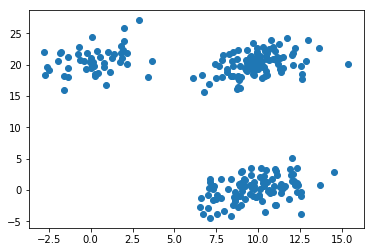

In [372]:
#df = pd.DataFrame({'a':[a], 'b':[b], 'c':[c]})
#df = pd.concat(npData.Series)
plt.scatter(np_array[:, 0], np_array[:, 1])

### 11. Find out the linkage matrix

In [373]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')
model.fit(np_array)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=6,
            pooling_func=<function mean at 0x000001F0D368CC80>)

Use ward as linkage metric and distance as Eucledian

In [374]:
Z = linkage(np_array, 'average')



In [375]:
c, coph_dists = cophenet(Z , pdist(np_array))

c

0.9629869148214444

In [376]:
Z
Z[1]
Z[1:10]

array([[3.20000000e+01, 8.90000000e+01, 5.75832175e-02, 2.00000000e+00],
       [2.02000000e+02, 2.47000000e+02, 5.84145989e-02, 2.00000000e+00],
       [1.51000000e+02, 2.22000000e+02, 6.64929223e-02, 2.00000000e+00],
       [7.00000000e+01, 8.20000000e+01, 6.87800904e-02, 2.00000000e+00],
       [1.63000000e+02, 2.48000000e+02, 7.32069142e-02, 2.00000000e+00],
       [1.90000000e+01, 2.30000000e+01, 8.04940201e-02, 2.00000000e+00],
       [2.24000000e+02, 2.33000000e+02, 8.25484955e-02, 2.00000000e+00],
       [1.53000000e+02, 2.34000000e+02, 8.82623535e-02, 2.00000000e+00],
       [6.20000000e+01, 7.50000000e+01, 1.02733434e-01, 2.00000000e+00]])

### 12. Plot the dendrogram for the consolidated dataframe

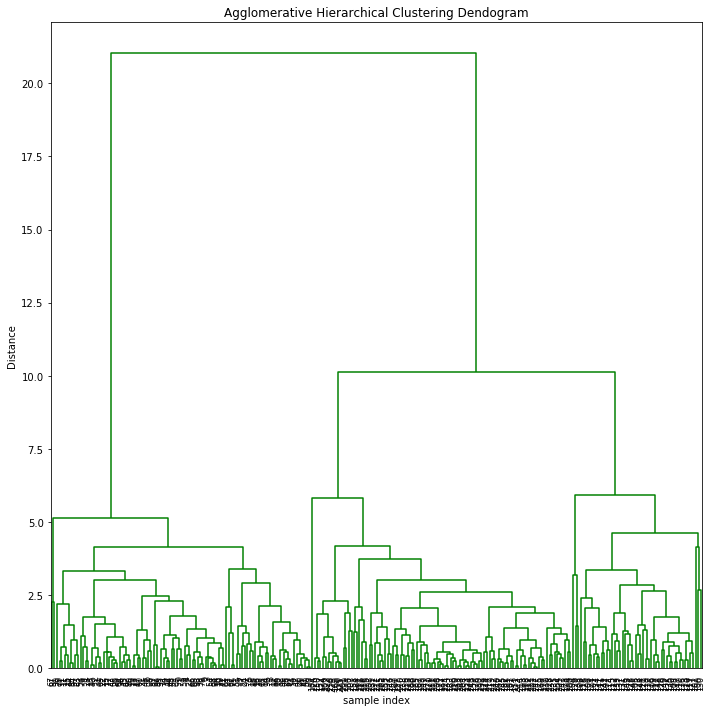

In [380]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 50, leaf_font_size= 8.)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

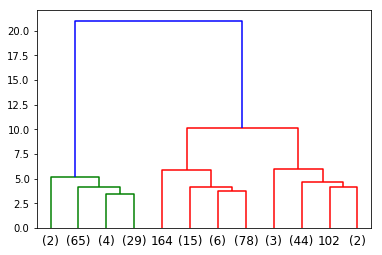

In [379]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

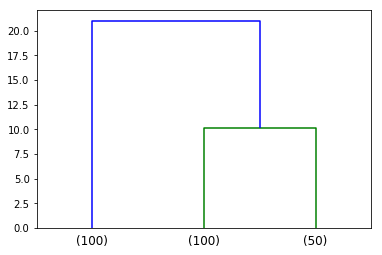

In [383]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [386]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 3, criterion='distance')

In [387]:
print(clusters)


[ 4  3  3  4  4  6  4  6  6  4  4  2  6  3  6  3  6  4  6  4  6  4  3  4
  6  2  6  4  3  4  2  3  4  6  2  4  3  2  4  4  3  6  3  3  4  3  4  6
  4  6  6  6  4  3  4  3  6  6  4  4  4  5  5  4  3  6  4  1  4  3  6  4
  4  6  4  5  3  3  4  2  3  1  6  2  2  6  3  4  6  4  6  2  6  4  4  6
  4  5  6  6 16 14 17 14 13 15 14 14 15 15 15 14 15 15 14 15 15 15 14 15
 15 15 15 15 14 14 15 15 15 12 16 15 15 15 14 15 15 15 12 15 15 14 14 15
 15 15 15 15 15 15  7 10  7 10 10  9 10 10  8 10 10 10 10 10 11 10  7 10
 10  7 10 10 10 10  7 10 10 10 10 10 10 10 10 10  8 10  8 10 10 10 10  8
  9 10 10  9 10  9 10  7 10  7 10  9 10 10 10  7  9  7 10  9 10 10 10  8
  8 10 10 10 10 10 10  7 10  7  7 10 10  7 10  9 10 10 10 10  7 10 10  7
 10 10 10 10 10 10  9 10 10 10]


### Use matplotlib to visually observe the clusters in 2D space 

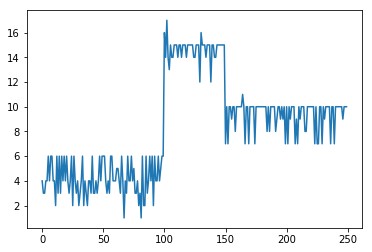

In [389]:
plt.plot(clusters)